In [1]:
import numpy as np
import tensorflow as tf
import sionna.rt as rt

import matplotlib.pyplot as plt

2024-10-08 16:42:24.229187: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 16:42:24.229219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 16:42:24.230129: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 16:42:24.235697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 16:42:24.785019: W tensorflow/compiler/tf2

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2024-10-08 16:42:25.845156: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 16:42:25.845403: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 16:42:25.845586: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
MITSUBA_XML_PATH = "/home/Anant/SionnaRT/Assets/HomeOfficeTransparent3/HomeOffice.xml"
scene = rt.load_scene(MITSUBA_XML_PATH)

2024-10-08 16:42:27.312286: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 16:42:27.312507: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 16:42:27.312669: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
scene.tx_array = rt.PlanarArray(num_rows=2, 
                            num_cols=2,
                            vertical_spacing=0.5,
                            horizontal_spacing=0.5,
                            pattern="iso",
                            polarization="V")

In [5]:
scene.rx_array = rt.PlanarArray(num_rows=2,
                            num_cols=2,
                            vertical_spacing=0.5,
                            horizontal_spacing=0.5,
                            pattern="iso",
                            polarization="V")

In [6]:
x = 4
y = -7
z = 2
scene.add(rt.Transmitter(name = "tx", 
                        position=tf.Variable([x, y, z], dtype=tf.float32),
                        orientation=tf.Variable([0, 0, 0], dtype=tf.float32),
                        power_dbm=tf.Variable(25, dtype=tf.float32)))

In [7]:
for x in np.linspace(-8, 8, 81): #321
    for y in np.linspace(-8,7, 76): #301
        scene.add(rt.Receiver(name = f"rx({x},{y})", 
                              position=tf.Variable([x, y, 1], dtype=tf.float32),
                              orientation=tf.Variable([0, 0, 0], dtype=tf.float32)))

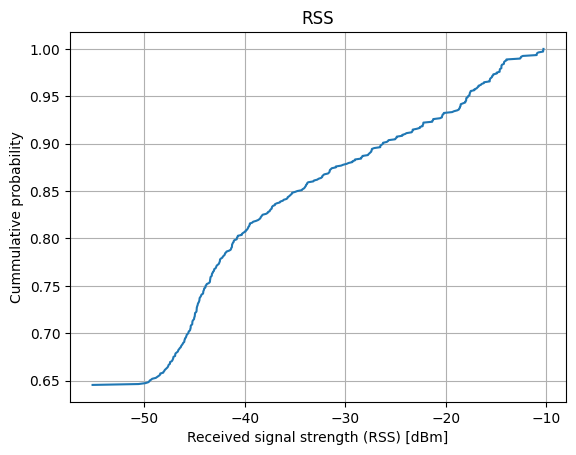

In [8]:
cm = scene.coverage_map(cm_cell_size=(0.5, 0.5), max_depth = 6).cdf(metric = "rss")
# scene.preview(coverage_map = cm, clip_at = 2.95)

In [9]:
# paths = scene.compute_paths(max_depth = 2)

In [10]:
# paths.types

In [11]:
# scene.preview(paths = paths, show_devices = False, clip_at = 2.95)